In [9]:
# import dependencies
import pandas as pd
import numpy as np
import gmaps
import requests
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import linregress
from config import key_dict
gkey=key_dict["maps"]

In [10]:
# read in csv file for data
all_data = pd.read_csv("Resources/all_data.csv")
all_data.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,Afghanistan,Southern Asia,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100
1,2016,Afghanistan,Southern Asia,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580
2,2017,Afghanistan,Southern Asia,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801
3,2018,Afghanistan,Southern Asia,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,NaN
4,2019,Afghanistan,Southern Asia,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,NaN


In [11]:
# read in csv for lat/lng
coordinates = pd.read_csv("Resources/coords.csv", encoding="Latin-1")
coordinates.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [12]:
# merge all_data and coordinates
merged_group_df=all_data.merge(coordinates, how="left", left_on="Country", right_on="name")
merged_group_df.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,country,latitude,longitude,name
0,2015,Afghanistan,Southern Asia,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100,AF,33.93911,67.709953,Afghanistan
1,2016,Afghanistan,Southern Asia,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580,AF,33.93911,67.709953,Afghanistan
2,2017,Afghanistan,Southern Asia,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801,AF,33.93911,67.709953,Afghanistan
3,2018,Afghanistan,Southern Asia,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,NaN,AF,33.93911,67.709953,Afghanistan
4,2019,Afghanistan,Southern Asia,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,NaN,AF,33.93911,67.709953,Afghanistan


In [38]:
# gather columns we need 
clean_data=merged_group_df[['Year', 'Region','Country','latitude','longitude', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',"Dystopia Residual"]]
clean_data.head()

,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,Southern Asia,Afghanistan,33.93911,67.709953,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100
1,2016,Southern Asia,Afghanistan,33.93911,67.709953,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580
2,2017,Southern Asia,Afghanistan,33.93911,67.709953,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801
3,2018,Southern Asia,Afghanistan,33.93911,67.709953,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,NaN
4,2019,Southern Asia,Afghanistan,33.93911,67.709953,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,NaN


In [44]:
# check if there is null values
merged_group_df.isnull().sum()

Year                               0
Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Generosity                         0
Dystopia Residual                312
country                            4
latitude                           0
longitude                          0
name                               0
dtype: int64

In [45]:
# group by region and country
group_df = clean_data.groupby(['Region','Country']).mean()
group_df.head()


Year   latitude   longitude  \
Region                     Country                                      
Australia and New Zealand  Australia    2017.0 -25.274398  133.775136   
                           New Zealand  2017.0 -40.900557  174.885971   
Central and Eastern Europe Albania      2017.0  41.153332   20.168331   
                           Armenia      2017.0  40.069099   45.038189   
                           Azerbaijan   2017.0  40.143105   47.576927   

                                        Happiness Rank  Happiness Score  \
Region                     Country                                        
Australia and New Zealand  Australia              10.0           7.2762   
                           New Zealand             8.2           7.3130   
Central and Eastern Europe Albania               106.4           4.7126   
                           Armenia               122.8           4.3932   
                           Azerbaijan             84.6           5.2292   

                                        Economy (GDP per Capita)    Family  \
Region                     Country                                           
Australia and New Zealand  Australia                    1.394885  1.409006   
                           New Zealand                  1.317509  1.439729   
Central and Eastern Europe Albania                      0.938633  0.754931   
                           Armenia                      0.839133  0.890873   
                           Azerbaijan                   1.073644  1.031750   

                                        Health (Life Expectancy)   Freedom  \
Region                     Country                                           
Australia and New Zealand  Australia                    0.914529  0.605043   
                           New Zealand                  0.891618  0.617782   
Central and Eastern Europe Albania                      0.787696  0.371898   
                           Armenia                      0.697851  0.216029   
                           Azerbaijan                   0.619653  0.380545   

                                        Trust (Government Corruption)  \
Region                     Country                                      
Australia and New Zealand  Australia                         0.314573   
                           New Zealand                       0.400015   
Central and Eastern Europe Albania                           0.043201   
                           Armenia                           0.038767   
                           Azerbaijan                        0.175756   

                                        Generosity  Dystopia Residual  
Region                     Country                                     
Australia and New Zealand  Australia      0.416078           2.292724  
                           New Zealand    0.432805           2.262079  
Central and Eastern Europe Albania        0.167887           1.772514  
                           Armenia        0.082394           1.752956  
                           Azerbaijan     0.049132           2.012237

In [41]:
# heatmap for all the countries 
gmaps.configure(api_key=gkey)
fig=gmaps.figure()
locations=group_df[["latitude","longitude"]]
happiness=group_df["Happiness Score"]
heat_layer=gmaps.heatmap_layer(locations,weights=happiness,
                               dissipating=False, 
                               max_intensity=group_df["Happiness Score"].max(), 
                               point_radius=3)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [25]:
# find the top ten countries
top_ten=group_df.sort_values(by=["Happiness Score"],ascending=False).head(10)
top_ten=top_ten.reset_index()
top_ten


,Region,Country,Year,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,Denmark,2017.0,56.263920,9.501785,2.2,7.5460,1.396729,1.447688,0.865249,0.625959,0.429374,0.318876,2.515046
1,Western Europe,Norway,2017.0,60.472024,8.468946,2.8,7.5410,1.519381,1.431075,0.873333,0.638049,0.343951,0.328990,2.468996
2,Western Europe,Finland,2017.0,61.924110,25.748151,3.6,7.5378,1.356960,1.434429,0.873836,0.621536,0.398474,0.217783,2.625231
3,Western Europe,Switzerland,2017.0,46.818188,8.227512,3.6,7.5114,1.472164,1.417332,0.928318,0.620642,0.379763,0.277432,2.496242
4,Western Europe,Iceland,2017.0,64.963051,-19.020835,3.2,7.5110,1.386523,1.492813,0.917744,0.618035,0.140145,0.419124,2.618698
5,Western Europe,Netherlands,2017.0,52.132633,5.291266,6.2,7.4046,1.411013,1.349646,0.878569,0.589651,0.298614,0.415150,2.489331
6,North America,Canada,2017.0,56.130366,-106.346771,6.8,7.3506,1.388129,1.387412,0.900558,0.610954,0.305846,0.389598,2.447958
7,Western Europe,Sweden,2017.0,60.128161,18.643501,8.6,7.3192,1.403981,1.368574,0.898991,0.617581,0.397502,0.336512,2.338689
8,Australia and New Zealand,New Zealand,2017.0,-40.900557,174.885971,8.2,7.3130,1.317509,1.439729,0.891618,0.617782,0.400015,0.432805,2.262079
9,Australia and New Zealand,Australia,2017.0,-25.274398,133.775136,10.0,7.2762,1.394885,1.409006,0.914529,0.605043,0.314573,0.416078,2.292724


In [32]:
# mark top ten countries
coordinates=top_ten[["latitude","longitude"]]
top_symbols=gmaps.symbol_layer(coordinates,
                           info_box_content=top_ten["Country"],
                          stroke_color="green")
fig.add_layer(top_symbols)
fig
                    

Figure(layout=FigureLayout(height='420px'))

In [29]:
botomn_ten=group_df.sort_values(by=["Happiness Score"],ascending=False).tail(10)
botomn_ten=botomn_ten.reset_index()
botomn_ten

,Region,Country,Year,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Sub-Saharan Africa,Madagascar,2017.00,-18.766947,46.869107,145.00,3.74540,0.265918,0.773236,0.434105,0.177375,0.062706,0.193293,1.862121
1,Middle East and Northern Africa,Yemen,2017.00,15.552727,48.516388,146.40,3.62580,0.489313,0.865448,0.365440,0.244175,0.067045,0.096929,1.747227
2,Sub-Saharan Africa,Togo,2017.00,8.619543,0.824782,148.20,3.54420,0.265871,0.323567,0.288529,0.363747,0.100969,0.174775,1.846630
3,Southern Asia,Afghanistan,2017.00,33.939110,67.709953,149.40,3.51280,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730,2.082827
4,Sub-Saharan Africa,Tanzania,2017.00,-6.369028,34.888822,150.80,3.46600,0.439777,0.939380,0.396732,0.386880,0.083699,0.311749,1.126537
5,Sub-Saharan Africa,Rwanda,2017.00,-1.940278,29.873888,152.00,3.43860,0.322057,0.788453,0.417543,0.581611,0.473468,0.226311,0.726224
6,Sub-Saharan Africa,South Sudan,2017.50,12.862807,30.217636,150.00,3.38250,0.358547,0.492378,0.198324,0.116421,0.110986,0.242665,2.194429
7,Middle East and Northern Africa,Syria,2017.00,34.802075,38.996815,152.60,3.29220,0.699109,0.355931,0.566281,0.081700,0.159547,0.431285,0.736015
8,Sub-Saharan Africa,Central African Republic,2017.25,6.611111,20.939444,153.25,3.13425,0.032125,0.000000,0.050191,0.322408,0.053114,0.243057,2.394152
9,Sub-Saharan Africa,Burundi,2017.00,-3.373056,29.918886,153.80,3.07900,0.062447,0.470817,0.211608,0.101320,0.106992,0.185921,1.873361


In [37]:
# mark bottom ten countries
coordinates=botomn_ten[["latitude","longitude"]]
botomn_symbols=gmaps.symbol_layer(coordinates,
                           info_box_content=botomn_ten["Country"],
                          stroke_color="blue")
fig.add_layer(botomn_symbols)
fig

Figure(layout=FigureLayout(height='420px'))

In [30]:
# group by year
year_df = clean_data.groupby('Year')
year_df["Happiness Score"].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,151.0,5.411517,1.150473,2.839,4.56800,5.2860,6.2965,7.587
2016,149.0,5.425523,1.146837,2.905,4.50800,5.4400,6.3550,7.526
2017,148.0,5.391899,1.134475,2.693,4.54625,5.3175,6.2120,7.537
2018,149.0,5.413329,1.120203,2.905,4.47100,5.4300,6.1920,7.632
2019,149.0,5.443812,1.110663,3.083,4.55900,5.4300,6.1980,7.769


From the table above, we can tell the countries's happiness score does not seem to vary much along the five years. Then we try to see if there is change among the top ten and botomn ten countries.

In [76]:
def get_top_ten(year):
    Year_data=clean_data.loc[clean_data["Year"]==year]
    Year_data_top_ten = Year_data.sort_values(by="Happiness Rank",ascending=True).head(10) 
    return (Year_data_top_ten)

In [79]:

Year_2015_top_ten= get_year_data(2015)
Year_2015_top_ten

,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
667,2015,Western Europe,Switzerland,46.818188,8.227512,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
286,2015,Western Europe,Iceland,64.963051,-19.020835,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
184,2015,Western Europe,Denmark,56.263920,9.501785,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
522,2015,Western Europe,Norway,60.472024,8.468946,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
122,2015,North America,Canada,56.130366,-106.346771,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
220,2015,Western Europe,Finland,61.924110,25.748151,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
491,2015,Western Europe,Netherlands,52.132633,5.291266,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
662,2015,Western Europe,Sweden,60.128161,18.643501,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
496,2015,Australia and New Zealand,New Zealand,-40.900557,174.885971,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
29,2015,Australia and New Zealand,Australia,-25.274398,133.775136,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [80]:
Year_2016_top_ten= get_year_data(2016)
Year_2016_top_ten

,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
185,2016,Western Europe,Denmark,56.263920,9.501785,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
668,2016,Western Europe,Switzerland,46.818188,8.227512,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
287,2016,Western Europe,Iceland,64.963051,-19.020835,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
523,2016,Western Europe,Norway,60.472024,8.468946,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
221,2016,Western Europe,Finland,61.924110,25.748151,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
123,2016,North America,Canada,56.130366,-106.346771,6,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
492,2016,Western Europe,Netherlands,52.132633,5.291266,7,7.339,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
497,2016,Australia and New Zealand,New Zealand,-40.900557,174.885971,8,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
30,2016,Australia and New Zealand,Australia,-25.274398,133.775136,9,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
663,2016,Western Europe,Sweden,60.128161,18.643501,10,7.291,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [81]:
Year_2017_top_ten= get_year_data(2017)
Year_2017_top_ten

,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
524,2017,Western Europe,Norway,60.472024,8.468946,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027
186,2017,Western Europe,Denmark,56.263920,9.501785,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707
288,2017,Western Europe,Iceland,64.963051,-19.020835,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2.322715
669,2017,Western Europe,Switzerland,46.818188,8.227512,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716
222,2017,Western Europe,Finland,61.924110,25.748151,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,2.430182
493,2017,Western Europe,Netherlands,52.132633,5.291266,6,7.377,1.503945,1.428939,0.810696,0.585384,0.282662,0.470490,2.294804
124,2017,North America,Canada,56.130366,-106.346771,7,7.316,1.479204,1.481349,0.834558,0.611101,0.287372,0.435540,2.187264
498,2017,Australia and New Zealand,New Zealand,-40.900557,174.885971,8,7.314,1.405706,1.548195,0.816760,0.614062,0.382817,0.500005,2.046456
664,2017,Western Europe,Sweden,60.128161,18.643501,9,7.284,1.494387,1.478162,0.830875,0.612924,0.384399,0.385399,2.097538
31,2017,Australia and New Zealand,Australia,-25.274398,133.775136,10,7.284,1.484415,1.510042,0.843887,0.601607,0.301184,0.477699,2.065211


In [82]:
Year_2018_top_ten= get_year_data(2018)
Year_2018_top_ten

,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
223,2018,Western Europe,Finland,61.924110,25.748151,1,7.632,1.305,1.592,0.874,0.681,0.393,0.202,NaN
525,2018,Western Europe,Norway,60.472024,8.468946,2,7.594,1.456,1.582,0.861,0.686,0.340,0.286,NaN
187,2018,Western Europe,Denmark,56.263920,9.501785,3,7.555,1.351,1.590,0.868,0.683,0.408,0.284,NaN
289,2018,Western Europe,Iceland,64.963051,-19.020835,4,7.495,1.343,1.644,0.914,0.677,0.138,0.353,NaN
670,2018,Western Europe,Switzerland,46.818188,8.227512,5,7.487,1.420,1.549,0.927,0.660,0.357,0.256,NaN
494,2018,Western Europe,Netherlands,52.132633,5.291266,6,7.441,1.361,1.488,0.878,0.638,0.295,0.333,NaN
125,2018,North America,Canada,56.130366,-106.346771,7,7.328,1.330,1.532,0.896,0.653,0.291,0.321,NaN
499,2018,Australia and New Zealand,New Zealand,-40.900557,174.885971,8,7.324,1.268,1.601,0.876,0.669,0.389,0.365,NaN
665,2018,Western Europe,Sweden,60.128161,18.643501,9,7.314,1.355,1.501,0.913,0.659,0.383,0.285,NaN
32,2018,Australia and New Zealand,Australia,-25.274398,133.775136,10,7.272,1.340,1.573,0.910,0.647,0.302,0.361,NaN


In [83]:
Year_2019_top_ten= get_year_data(2019)
Year_2019_top_ten

,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
224,2019,Western Europe,Finland,61.924110,25.748151,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153,NaN
188,2019,Western Europe,Denmark,56.263920,9.501785,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252,NaN
526,2019,Western Europe,Norway,60.472024,8.468946,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271,NaN
290,2019,Western Europe,Iceland,64.963051,-19.020835,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354,NaN
495,2019,Western Europe,Netherlands,52.132633,5.291266,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322,NaN
671,2019,Western Europe,Switzerland,46.818188,8.227512,6,7.480,1.452,1.526,1.052,0.572,0.343,0.263,NaN
666,2019,Western Europe,Sweden,60.128161,18.643501,7,7.343,1.387,1.487,1.009,0.574,0.373,0.267,NaN
500,2019,Australia and New Zealand,New Zealand,-40.900557,174.885971,8,7.307,1.303,1.557,1.026,0.585,0.380,0.330,NaN
126,2019,North America,Canada,56.130366,-106.346771,9,7.278,1.365,1.505,1.039,0.584,0.308,0.285,NaN
38,2019,Western Europe,Austria,47.516231,14.550072,10,7.246,1.376,1.475,1.016,0.532,0.226,0.244,NaN


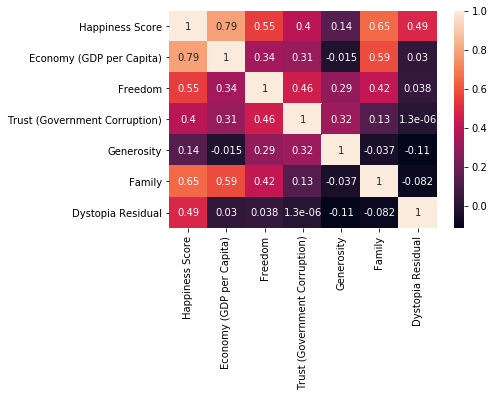

In [85]:
Happy_factors_df=clean_data[['Happiness Score','Economy (GDP per Capita)',
                             'Freedom','Trust (Government Corruption)',
                             'Generosity', 'Family',"Dystopia Residual"]]

corrMatrix = Happy_factors_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

From the above table, we can tell the top three factors contributing to happiness score are: Economy(GDP per Capita),Family and Freedom

r value is: 0.7870779786627908
r squared value is: 0.6194917444959046


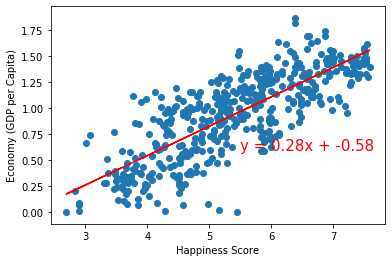

In [50]:
# regression between Happiness score and Economy
x_values = clean_data["Happiness Score"]
y_values = clean_data["Economy (GDP per Capita)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.6),fontsize=15,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')
print(f"r value is: {rvalue}")
print(f"r squared value is: {rvalue**2}")
plt.show()

r value is: 0.4988450784687635
r squared value is: 0.24884641231250684


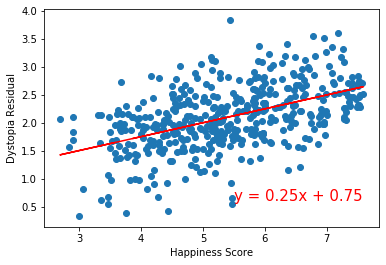

In [51]:
clean_data=clean_data.dropna()
x_values = clean_data["Happiness Score"]
y_values = clean_data["Dystopia Residual"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.6),fontsize=15,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Dystopia Residual')
print(f"r value is: {rvalue}")
print(f"r squared value is: {rvalue**2}")
plt.show()

In [52]:
# find countries that have some missing data (didn't participate every year, etc)

In [19]:
# create summary table with statistics

In [ ]:
# find top 5 / bottom 5 for each year

In [ ]:
# find countries with biggest change in rankings/ratings

In [ ]:
# aggregate average for each country

# scatterplot matrix (as heatmap) to see correlations for each variable

# chart GDP vs Life expectancy (or other variables for a country)

In [ ]:
all_data.groupby("Region").mean()

In [ ]:
all_data.groupby("Country").mean()